In [3]:
from sklearn.cluster import KMeans
import pandas as pd  
import numpy as np  
from sklearn.model_selection import GridSearchCV
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


In [4]:
#, nrows=100000
Bike = pd.read_csv("C:/機器學習/df_0907.csv", sep=",")
Bike


,sno,bike_lat,bike_lng,tot,time,date,Hr,weekday,weekday_num,holiday,...,Weather_lat,Weather_Dist,Generation,outlier,sarea,UVI,return_sec,rent_sec,rent_count,return_count
0,80,25.02751,121.495869,44,2017-01-04 12:00:00,2017-01-04,12,Wednesday,3,0,...,25.037658,2223.183703,1,True,萬華區,5,1729,15884,9,1
1,80,25.02751,121.495869,44,2017-01-07 05:00:00,2017-01-07,5,Saturday,6,1,...,25.037658,2223.183703,1,True,萬華區,0,1427,7507,2,1
2,80,25.02751,121.495869,44,2017-01-07 21:00:00,2017-01-07,21,Saturday,6,1,...,25.037658,2223.183703,1,True,萬華區,0,12290,16787,10,13
3,80,25.02751,121.495869,44,2017-01-09 07:00:00,2017-01-09,7,Monday,1,0,...,25.037658,2223.183703,1,True,萬華區,0,8997,8095,12,17
4,80,25.02751,121.495869,44,2017-01-14 12:00:00,2017-01-14,12,Saturday,6,1,...,25.037658,2223.183703,1,True,萬華區,1,5203,6130,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19212469,500112084,25.02976,121.564200,13,2022-04-30 17:00:00,2022-04-30,17,Saturday,6,1,...,25.037822,898.350579,2,True,信義區,0,2048,2914,3,2
19212470,500112084,25.02976,121.564200,13,2022-04-29 11:00:00,2022-04-29,11,Friday,5,0,...,25.037822,898.350579,2,True,信義區,6,741,645,2,1
19212471,500112084,25.02976,121.564200,13,2022-04-29 09:00:00,2022-04-29,9,Friday,5,0,...,25.037822,898.350579,2,True,信義區,4,0,2127,1,0
19212472,500112084,25.02976,121.564200,13,2022-04-29 18:00:00,2022-04-29,18,Friday,5,0,...,25.037822,898.350579,2,True,信義區,0,2402,3121,2,2


In [9]:
Bike = Bike[(Bike['date'] >= '2021-01-01') & (Bike['date'] <= '2022-04-30')]


,sno,bike_lat,bike_lng,tot,time,date,Hr,weekday,weekday_num,holiday,...,Weather_lat,Weather_Dist,Generation,outlier,sarea,UVI,return_sec,rent_sec,rent_count,return_count
309,80,25.027510,121.495869,44,2021-01-05 22:00:00,2021-01-05,22,Tuesday,2,0,...,25.037658,2223.183703,1,True,萬華區,0,4384,2116,4,7
310,80,25.027510,121.495869,44,2021-01-06 10:00:00,2021-01-06,10,Wednesday,3,0,...,25.037658,2223.183703,1,True,萬華區,2,2450,1867,4,5
311,80,25.027510,121.495869,44,2021-01-07 23:00:00,2021-01-07,23,Thursday,4,0,...,25.037658,2223.183703,1,True,萬華區,0,2378,2761,2,3
312,80,25.027510,121.495869,44,2021-01-15 05:00:00,2021-01-15,5,Friday,5,0,...,25.037658,2223.183703,1,True,萬華區,0,138,1143,2,1
313,80,25.027510,121.495869,44,2021-02-07 06:00:00,2021-02-07,6,Sunday,7,1,...,25.037658,2223.183703,1,True,萬華區,0,5986,14928,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,125,25.038609,121.498495,14,2021-12-07 08:00:00,2021-12-07,8,Tuesday,2,0,...,25.037658,1653.234510,1,True,萬華區,0,582,6719,6,1
99996,125,25.038609,121.498495,30,2021-12-10 20:00:00,2021-12-10,20,Friday,5,0,...,25.037658,1653.234510,1,True,萬華區,0,3649,5948,1,4
99997,125,25.038609,121.498495,14,2021-12-10 20:00:00,2021-12-10,20,Friday,5,0,...,25.037658,1653.234510,1,True,萬華區,0,3649,5948,1,4
99998,125,25.038609,121.498495,30,2022-01-03 01:00:00,2022-01-03,1,Monday,1,0,...,25.037658,1653.234510,1,True,萬華區,0,1484,0,0,1


In [6]:
Bike.info() # 直接查看信息
Bike.isnull().sum() # 每列有多少個缺失值
Bike.isna().sum(1) # 每行有多少個缺失值
Bike.isna().sum().sum() # 總共有幾個缺失值
Bike.count() # 統計列的非NaN個數

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sno            100000 non-null  int64  
 1   bike_lat       100000 non-null  float64
 2   bike_lng       100000 non-null  float64
 3   tot            100000 non-null  int64  
 4   time           100000 non-null  object 
 5   date           100000 non-null  object 
 6   Hr             100000 non-null  int64  
 7   weekday        100000 non-null  object 
 8   weekday_num    100000 non-null  int64  
 9   holiday        100000 non-null  int64  
 10  school_off     100000 non-null  int64  
 11  Temperature    100000 non-null  float64
 12  RH             100000 non-null  float64
 13  WS             100000 non-null  float64
 14  rain           100000 non-null  int64  
 15  Precp          100000 non-null  float64
 16  MRT_Out_ppl    100000 non-null  int64  
 17  ar             100000 non-null

sno              100000
bike_lat         100000
bike_lng         100000
tot              100000
time             100000
date             100000
Hr               100000
weekday          100000
weekday_num      100000
holiday          100000
school_off       100000
Temperature      100000
RH               100000
WS               100000
rain             100000
Precp            100000
MRT_Out_ppl      100000
ar               100000
MRT_Dist         100000
School_Dist      100000
sna              100000
station          100000
MRT_Station      100000
MRT_No           100000
MRT_Exit_Name    100000
Exit_No          100000
MRT_lng          100000
MRT_lat          100000
School           100000
School_lat       100000
School_lng       100000
StationID        100000
WeatherSiteID    100000
WeatherSite      100000
Weather_lng      100000
Weather_lat      100000
Weather_Dist     100000
Generation       100000
outlier          100000
sarea            100000
UVI              100000
return_sec      

In [7]:
Bike.columns

Index(['sno', 'bike_lat', 'bike_lng', 'tot', 'time', 'date', 'Hr', 'weekday',
       'weekday_num', 'holiday', 'school_off', 'Temperature', 'RH', 'WS',
       'rain', 'Precp', 'MRT_Out_ppl', 'ar', 'MRT_Dist', 'School_Dist', 'sna',
       'station', 'MRT_Station', 'MRT_No', 'MRT_Exit_Name', 'Exit_No',
       'MRT_lng', 'MRT_lat', 'School', 'School_lat', 'School_lng', 'StationID',
       'WeatherSiteID', 'WeatherSite', 'Weather_lng', 'Weather_lat',
       'Weather_Dist', 'Generation', 'outlier', 'sarea', 'UVI', 'return_sec',
       'rent_sec', 'rent_count', 'return_count'],
      dtype='object')

In [56]:
# ds = Bike.values
ds = DataFrame(Bike)
X_choice = ds.loc[:, ['Hr', 'holiday', 'school_off', 'tot']]
kmeansModel = KMeans(n_clusters=4, random_state=46)
clusters_pred = kmeansModel.fit_predict(X_choice)
X_choice ['k_meeans'] = clusters_pred
Bike ['k_meeans'] = clusters_pred

In [75]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_choice_reindex = Bike.reindex(columns=[
    'Hr', 'holiday', 'school_off', 'Temperature', 'RH', 'WS',
    'Precp', 'MRT_Dist', 'School_Dist', 'k_meeans','rent_count'
])
X_choice_reindex

,Hr,holiday,school_off,Temperature,RH,WS,Precp,MRT_Dist,School_Dist,k_meeans,rent_count
0,12,0,0,25.5,66.0,4.2,0.0,934.143832,118.041403,1,9
1,12,0,0,25.5,66.0,4.2,0.0,62.191721,442.708291,1,12
2,12,0,0,25.5,66.0,4.2,0.0,363.198356,604.317362,1,7
3,12,0,0,25.5,66.0,4.2,0.0,422.477866,662.539051,1,1
4,12,0,0,25.5,66.0,4.2,0.0,693.312797,342.897365,1,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,6,0,0,22.8,70.0,2.8,0.0,449.611345,275.072754,1,2
99996,6,0,0,22.8,70.0,2.8,0.0,357.187326,250.443709,1,4
99997,6,0,0,22.8,70.0,2.8,0.0,476.839311,513.708768,1,4
99998,6,0,0,22.8,70.0,2.8,0.0,430.082090,184.684470,1,3


In [93]:
ds = X_choice_reindex.values
X = ds[:, 0:10]
y = ds[:, 10]
y = y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



In [96]:
#設定LASSO超參數
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)
LassoCV(cv=5, max_iter=10000, random_state=0)
model.alpha_


0.8553950204664368

In [97]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)
Lasso(alpha=0.8553950204664368)
# model = LassoCV()  # LassoCV自動調節alpha可以實現選擇最佳的alpha。
# model = LassoLarsCV()  # LassoLarsCV自動調節alpha可以實現選擇最佳的alpha

print('係數矩陣:\n',model.coef_)

係數矩陣:
 [ 4.47167332e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -6.11422873e-02  0.00000000e+00 -0.00000000e+00 -2.76762282e-03
 -1.76214702e-03  5.81863214e+00]


In [64]:
# K-means 分群
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

ds= DataFrame(Bike)
X_choice = ds.loc[:, [
    'Hr', 'holiday', 'school_off', 'Temperature', 'RH', 'WS', 'Precp',
    'MRT_Dist', 'School_Dist', 'rent_count'
]]

model = KMeans(init = "k-means++", n_clusters = 10)
model.fit(X_choice)
print(model.cluster_centers_)


[[1.32325173e+01 3.11936277e-01 4.33290383e-01 2.35921284e+01
  7.62235446e+01 1.66428488e+00 1.42696498e-01 1.12083606e+03
  2.30337253e+02 3.80039827e+00]
 [1.31217454e+01 3.16764433e-01 4.39127303e-01 2.36279047e+01
  7.54762066e+01 1.68949779e+00 1.59159206e-01 3.54979435e+02
  4.07750639e+02 5.74560049e+00]
 [1.32462139e+01 3.25608077e-01 4.38962827e-01 2.35944011e+01
  7.57418082e+01 1.56893070e+00 1.02684718e-01 1.29444212e+03
  8.66594791e+02 3.40592015e+00]
 [1.33026093e+01 3.18705524e-01 4.43070146e-01 2.36034565e+01
  7.65322772e+01 1.44335818e+00 1.82006100e-01 5.52018767e+02
  7.52023228e+02 4.22297526e+00]
 [1.29928069e+01 3.15390088e-01 4.43601296e-01 2.36962928e+01
  7.53545095e+01 1.75090507e+00 2.05786104e-01 6.66445081e+01
  3.54302826e+02 1.17680816e+01]
 [1.33099797e+01 3.07777025e-01 4.44256184e-01 2.36228312e+01
  7.60333362e+01 1.52027279e+00 2.01618096e-01 7.02375677e+02
  3.35089734e+02 5.01380888e+00]
 [1.30163412e+01 3.20446393e-01 4.51773615e-01 2.33597449e

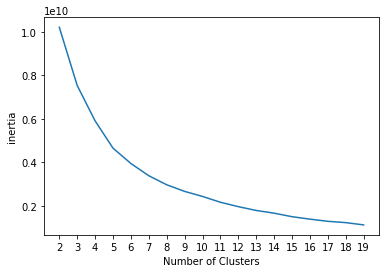

In [65]:
iner = [] 
for i in range(2,20):     
    model = KMeans(init = "k-means++", n_clusters = i)     
    model.fit(X_choice)     
    iner.append(model.inertia_) 
plt.plot(range(2, 20), iner) 
plt.xlabel('Number of Clusters') 
plt.ylabel('inertia') 
plt.xticks(range(2,20,1)) 
plt.show() 

In [66]:
kmeansModel = KMeans(n_clusters=4, random_state=46)
clusters_pred = kmeansModel.fit_predict(X_choice)
X_choice ['k_meeans'] = clusters_pred
X_choice

,Hr,holiday,school_off,Temperature,RH,WS,Precp,MRT_Dist,School_Dist,rent_count,k_meeans
0,12,0,0,25.5,66.0,4.2,0.0,934.143832,118.041403,9,2
1,12,0,0,25.5,66.0,4.2,0.0,62.191721,442.708291,12,1
2,12,0,0,25.5,66.0,4.2,0.0,363.198356,604.317362,7,0
3,12,0,0,25.5,66.0,4.2,0.0,422.477866,662.539051,1,0
4,12,0,0,25.5,66.0,4.2,0.0,693.312797,342.897365,1,2
...,...,...,...,...,...,...,...,...,...,...,...
99995,6,0,0,22.8,70.0,2.8,0.0,449.611345,275.072754,2,2
99996,6,0,0,22.8,70.0,2.8,0.0,357.187326,250.443709,4,1
99997,6,0,0,22.8,70.0,2.8,0.0,476.839311,513.708768,4,0
99998,6,0,0,22.8,70.0,2.8,0.0,430.082090,184.684470,3,2


In [23]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
ds = X_choice.values
X = ds[:,7]
y = ds[:,8]
y= y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Feature: 0, Score: 0.16320


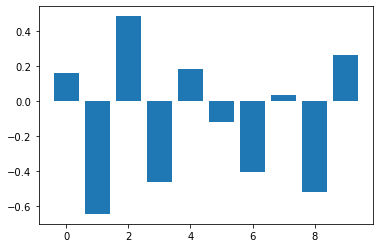

Feature: 1, Score: -0.64301


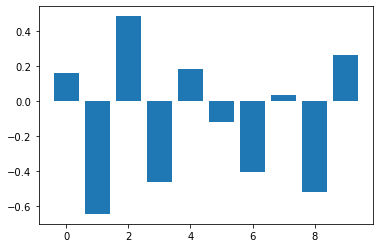

Feature: 2, Score: 0.48497


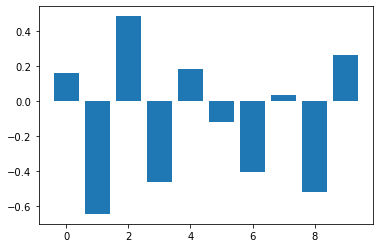

Feature: 3, Score: -0.46190


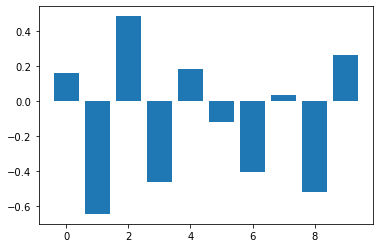

Feature: 4, Score: 0.18432


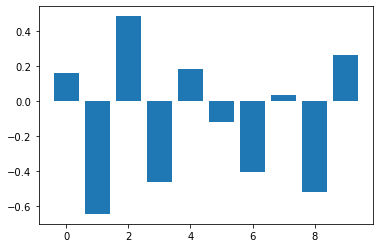

Feature: 5, Score: -0.11978


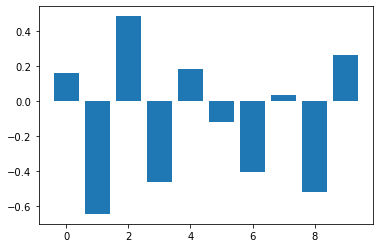

Feature: 6, Score: -0.40602


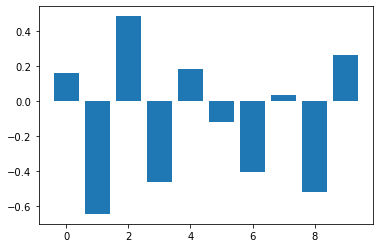

Feature: 7, Score: 0.03772


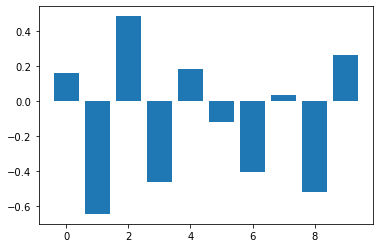

Feature: 8, Score: -0.51785


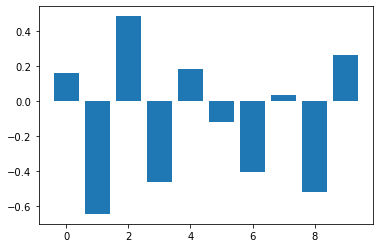

Feature: 9, Score: 0.26540


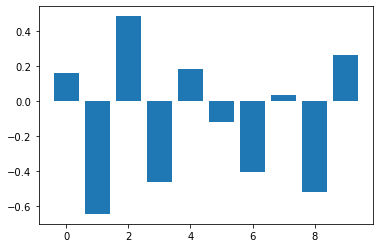

In [18]:
# 選取特徵重要性
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

In [24]:
X_choice.info() # 直接查看信息
X_choice.isnull().sum() # 每列有多少個缺失值
X_choice.isna().sum(1) # 每行有多少個缺失值
X_choice.isna().sum().sum() # 總共有幾個缺失值
X_choice.count() # 統計列的非NaN個數

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17948508 entries, 0 to 17948507
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Hr           float64
 1   MRT_Out_ppl  float64
 2   holiday      int64  
 3   school_off   int64  
 4   Temperature  float64
 5   RH           float64
 6   WS           float64
 7   Precp        float64
 8   k_meeans     int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 1.1 GB


Hr             17948508
MRT_Out_ppl    17948508
holiday        17948508
school_off     17948508
Temperature    17948508
RH             17948508
WS             17948508
Precp          17948508
k_meeans       17948508
dtype: int64

In [26]:
# 隨機森林分類
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# ds = Bike.values
ds= DataFrame(Bike)
kmeansModel = KMeans(n_clusters=13, random_state=46)
X_choice = ds.loc[:,['Hr','MRT_Out_ppl','holiday','school_off','Temperature','RH','WS','Precp','rent_sec','rent_count','return_sec','return_count']]
clusters_pred = kmeansModel.fit_predict(X_choice)
X_choice ['k_meeans'] = clusters_pred
# X_choice_reindex = X_choice.reindex(columns=['Hr','MRT_Out_ppl','holiday','school_off','Temperature','RH','WS','Precp','rent_sec','rent_count','return_sec','k_meeans','return_count'])
ds = X_choice.values
X = ds[:,1:11]
y = ds[:,12]
y= y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [27]:
# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=100, criterion = 'gini')
# 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_train)

In [28]:
# 預測成功的比例
print('訓練集: ',randomForestModel.score(X_train,y_train))
print('測試集: ',randomForestModel.score(X_test,y_test))

訓練集:  1.0
測試集:  0.9815


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0 )
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 117    0    0    0    2    0    0    0    0    0    2    0]
 [   0 1077    0    0    0    4    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0   11    2    0    0    0    0    0    0    0]
 [   1    0    0    0  105    0    0    0    2    0    0    0]
 [   1    2    0    0    0  283    0    0    2    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0    0    0]
 [   0    0    0    0    0    0    0   11    0    0    0    0]
 [   0    5    0    0    4    4    0    0  302    0    0    0]
 [   0    0    0    3    0    0    0    1    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0   49    0]
 [   0    0    0    0    0    0    0    0    0    0    3    3]]


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       121
           1       0.99      1.00      0.99      1082
           2       0.00      0.00      0.00         1
           3       0.79      0.85      0.81        13
           4       0.92      0.97      0.95       108
           5       0.97      0.98      0.98       288
           6       0.00      0.00      0.00         1
           8       0.79      1.00      0.88        11
           9       0.98      0.96      0.97       315
          10       0.00      0.00      0.00         4
          11       0.91      0.98      0.94        50
          12       1.00      0.50      0.67         6

    accuracy                           0.98      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.98      0.98      0.98      2000



c:\Users\j8003\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\j8003\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\j8003\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.tree import export_graphviz
from sklearn import tree

# Export as dot
export_graphviz(tree, 'tree.dot', rounded = True, 
                feature_names = ['Hr','MRT_Out_ppl','holiday','school_off','Temperature','RH','WS','Precp','rent_sec','rent_count','return_sec','return_count'], 
                class_names = ['0', '1'], filled = True)
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400'])
from IPython.display import Image
Image('tree.png')


TypeError: <module 'sklearn.tree' from 'c:\\Users\\j8003\\anaconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'> is not an estimator instance.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.model_selection import GridSearchCV
from pandas import Series,DataFrame

In [3]:
from sklearn.model_selection import train_test_split
#ds= DataFrame(Bike)
Bike = pd.read_csv("C:/機器學習/df_Final.csv",sep = ",")
ds= DataFrame(Bike)
X_choice = ds.loc[:, ['Hr', 'holiday', 'school_off', 'rent_count']]
kmeansModel = KMeans(n_clusters=4, random_state=46)
clusters_pred = kmeansModel.fit_predict(X_choice)
X_choice ['k_meeans'] = clusters_pred
Bike ['k_meeans'] = clusters_pred
X_choice_reindex = Bike.reindex(columns=['Hr', 'holiday', 'school_off','Temperature','RH','WS','Precp','MRT_Dist','School_Dist','k_meeans','rent_count'])


C:\Users\Student\AppData\Local\Temp\ipykernel_8656\2946484753.py:3: DtypeWarning: Columns (22,30,40) have mixed types. Specify dtype option on import or set low_memory=False.
  Bike = pd.read_csv("C:/機器學習/df_Final.csv",sep = ",")


In [14]:
ds = X_choice_reindex.values
X = ds[:,0:7]
y = ds[:,7]
y= y.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [15]:
# standardize the feature 標準化
sc = StandardScaler()
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.fit_transform(X_test)

In [16]:
# 構造協方差矩陣，得到特徵向量和特徵值
cov_matrix = np.cov(x_train_std.T)
eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
print("values\n ", eigen_val, "\nvector\n ", eigen_vec)

values
  [1.82018555 1.49352185 0.17801113 0.50229777 0.915977   1.08276846
 1.00723874] 
vector
  [[-1.84682732e-02  1.64249382e-01  6.56548659e-03  8.87730056e-03
  -7.00987190e-01  5.67037492e-01  3.99555495e-01]
 [-6.23397426e-01 -3.14280753e-01 -6.53291181e-01  1.96948671e-01
   6.72420048e-03  1.74304780e-01 -1.28832215e-01]
 [-6.88321603e-01 -1.66450306e-01  6.89923773e-01 -1.48728764e-01
  -6.98598965e-04  5.96788273e-03  1.88813597e-02]
 [-3.00021637e-01  5.29800275e-01 -2.96106292e-01 -5.53463537e-01
  -1.74513327e-03 -3.72355874e-01  3.10879268e-01]
 [ 2.14553582e-01 -6.60228998e-01 -9.72034696e-02 -6.99790203e-01
  -1.31829692e-01  2.83292829e-02  2.69809440e-02]
 [ 5.43026162e-03  2.66746776e-01 -1.64394124e-03 -3.28018579e-01
   5.31537181e-01  7.11659779e-01 -1.79517026e-01]
 [ 3.42378873e-02 -2.42486165e-01 -6.52393371e-03  1.88116360e-01
   4.56790289e-01  4.62560708e-02  8.32947122e-01]]


In [1]:
import numpy as np # 快速操作結構陣列的工具
import matplotlib.pyplot as plt  # 視覺化繪製
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV   # Lasso迴歸,LassoCV交叉驗證實現alpha的選取，LassoLarsCV基於最小角迴歸交叉驗證實現alpha的選取
# ========Lasso迴歸========
model = Lasso(alpha=0.01)  # 調節alpha可以實現對擬合的程度
# model = LassoCV()  # LassoCV自動調節alpha可以實現選擇最佳的alpha。
# model = LassoLarsCV()  # LassoLarsCV自動調節alpha可以實現選擇最佳的alpha
model.fit(X, y)   # 線性迴歸建模
print('係數矩陣:\n',model.coef_)
# print('線性迴歸模型:\n',model)
# print('最佳的alpha：',model.alpha_)  # 只有在使用LassoCV、LassoLarsCV時才有效

NameError: name 'X' is not defined